In [58]:
from micecat_field import *

ra_arr = np.arange(32,59,2)[::2]
dec_arr = np.arange(2,29,3)[::2]

mcfield = micecat_field(ra_arr[0], dec_arr[0])
df0 = mcfield.get_micecat_df(add_fields=['sdss_r_abs_mag',
                                         'euclid_nisp_y_true'])
sp = np.where((df0['x']>0.5) & (df0['x']<1023.5) \
              & (df0['y']>0.5) & (df0['y']<1023.5))[0]
df0 = df0.iloc[sp]

In [61]:
mcfield = micecat_field(ra_arr[0], dec_arr[0],Nx=1024,Ny=1024)
srcmap = mcfield.make_map('euclid_nisp_y', df=df0)
l,Cl, Clerr = get_power_spec(srcmap)
df0r = df0.copy()
df0r['x'] = np.random.uniform(0.5,1023.5,len(df0))
df0r['y'] = np.random.uniform(0.5,1023.5,len(df0))

srcmapr = mcfield.make_map('euclid_nisp_y', df=df0r)
l,Clr, Clerrr = get_power_spec(srcmapr)

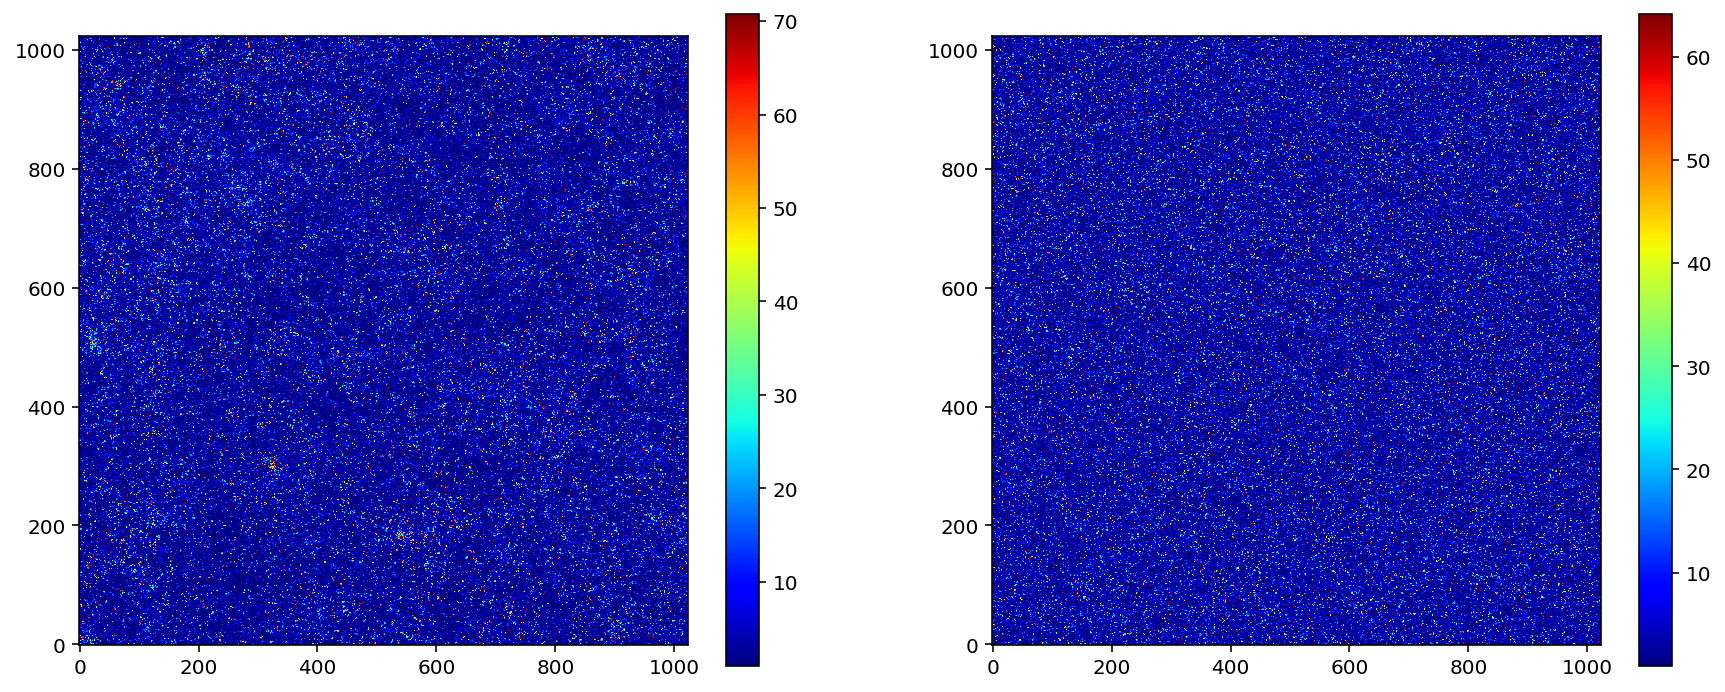

In [62]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
imageclip(srcmap, ax=ax[0])
imageclip(srcmapr, ax=ax[1])

In [63]:
m_arr = df0.euclid_nisp_y_true.values
wl = 1.073286
nu = 3e5/wl # GHz
sr = (2*(np.pi/180.0))**2
Fnu_arr = 3631. * 10**(-m_arr / 2.5) # Jy
nuFnu_arr = Fnu_arr * nu * (u.GHz * u.Jy).to(u.nW/u.m**2) # nW/m2
Cl_sh = np.sum(nuFnu_arr**2)/sr

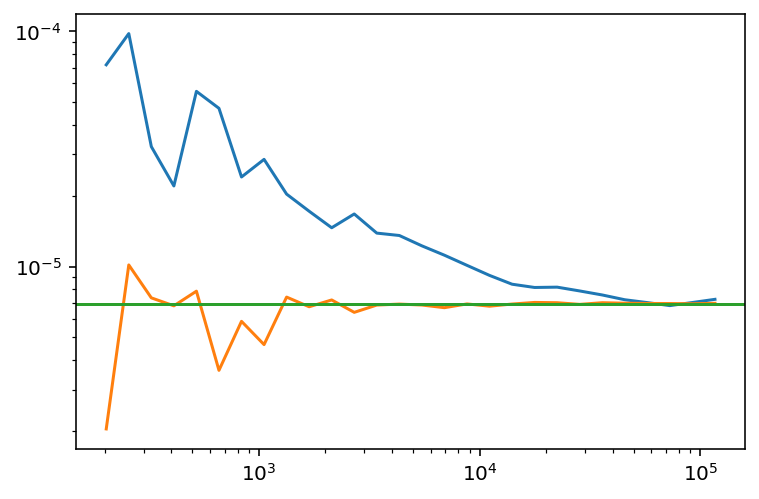

In [68]:
plt.loglog(l,Cl)
plt.loglog(l,Clr)
plt.axhline(Cl_sh, c='C2')

In [83]:
srcmapr1 = np.zeros_like(srcmapr)
Nrep = 500
for i in range(Nrep):
    df0r = df0.copy()
    df0r['x'] = np.random.uniform(0.5,1023.5,len(df0))
    df0r['y'] = np.random.uniform(0.5,1023.5,len(df0))
    srcmapr1 += mcfield.make_map('euclid_nisp_y', df=df0r)

l,Clr, Clerrr = get_power_spec(srcmapr1)

167.59920120239258


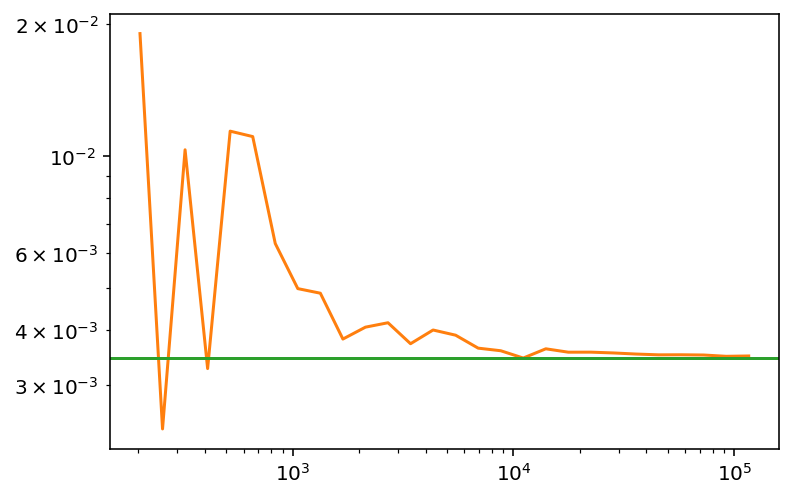

In [84]:
plt.loglog(l,Clr, c='C1')
plt.axhline(Cl_sh*Nrep, c='C2')
Navg = len(df0r)*Nrep/srcmapr1.size
print(Navg)